In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
#plotting the best parameters
import matplotlib.patches as mpatches


from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.metrics import roc_curve
import numpy as np

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [2]:
path = '/Ml files/cyberbully detection/'

In [3]:
df = pd.read_csv(path + "dataset/experimental_dataset.csv")
df.head()

,Text,aggressive_label,attack_label,toxicity_label,sexism_recism_label,acceptable
0,creative dictionary definitions terms insuranc...,0.0,0.0,0.0,0.0,1.0
1,ummm article uses imperial measurements si one...,0.0,0.0,0.0,0.0,1.0
2,disagree would leave introductory part since p...,0.0,0.0,0.0,0.0,1.0
3,know got idea mt airys counties two one tokerb...,0.0,0.0,0.0,0.0,1.0
4,marcusaurelius exactly user banned,0.0,0.0,0.0,0.0,1.0


In [4]:
#removing shortwords
df.Text=df['Text'].astype(str)
tokenized_df=df['Text'].apply(lambda x: x.split())
tokenized_df.head(5)

0    [creative, dictionary, definitions, terms, ins...
1    [ummm, article, uses, imperial, measurements, ...
2    [disagree, would, leave, introductory, part, s...
3    [know, got, idea, mt, airys, counties, two, on...
4              [marcusaurelius, exactly, user, banned]
Name: Text, dtype: object

In [5]:
df['Text']=df['Text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head(5)

,Text,aggressive_label,attack_label,toxicity_label,sexism_recism_label,acceptable
0,creative dictionary definitions terms insuranc...,0.0,0.0,0.0,0.0,1.0
1,ummm article uses imperial measurements ones t...,0.0,0.0,0.0,0.0,1.0
2,disagree would leave introductory part since p...,0.0,0.0,0.0,0.0,1.0
3,know idea airys counties tokerboy added counti...,0.0,0.0,0.0,0.0,1.0
4,marcusaurelius exactly user banned,0.0,0.0,0.0,0.0,1.0


In [6]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
contvec = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = contvec.fit_transform(df['Text'].values.astype('U'))

In [7]:
target_cols = ['aggressive_label', 'attack_label', 'toxicity_label', 'sexism_recism_label', 'acceptable']

In [8]:
from sklearn.model_selection import train_test_split
X=text_counts
y = df[target_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=19)

In [9]:
print('training data length: ', X_train.shape[0])
print('testing data length:  ',  X_test.shape[0])

training data length:  76486
testing data length:   19122


In [10]:
from collections import defaultdict

accuracy_data = defaultdict(list)
recall_data = defaultdict(list)
precision_data = defaultdict(list)
fscore_data = defaultdict(list)
auc_data = defaultdict(list)


# Logistic Regression

In [11]:
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    model = LogisticRegression()
    model.fit(X_train,y)
    y_pred = model.predict(X_test)
    
    acc =accuracy_score(y_test[col], y_pred)
    rec =recall_score(y_test[col], y_pred,average = 'macro')
    pre =precision_score(y_test[col], y_pred,average = 'macro')
    f1 = (2*pre*rec)/(pre+rec)

    
    print('Testing accuracy is {}'.format(round(acc,5)))
    print('Testing recall is {}'.format(round(rec,5)))
    print('Testing precision is {}'.format(round(pre,5)))
    print('Testing f1 score is {}'.format(round(f1,5)))

    
    accuracy_data[col].append(round(acc,5))
    recall_data[col].append(round(rec,5))
    precision_data[col].append(round(pre,5))
    fscore_data[col].append(round(f1,5))

 
----prediction of aggressive_label column----
 
Testing accuracy is 0.91397
Testing recall is 0.7679
Testing precision is 0.85823
Testing f1 score is 0.81056
 
----prediction of attack_label column----
 
Testing accuracy is 0.92234
Testing recall is 0.77543
Testing precision is 0.86483
Testing f1 score is 0.8177
 
----prediction of toxicity_label column----
 
Testing accuracy is 0.92035
Testing recall is 0.78735
Testing precision is 0.87364
Testing f1 score is 0.82825
 
----prediction of sexism_recism_label column----
 
Testing accuracy is 0.96517
Testing recall is 0.74323
Testing precision is 0.88876
Testing f1 score is 0.8095
 
----prediction of acceptable column----
 
Testing accuracy is 0.87611
Testing recall is 0.78691
Testing precision is 0.8478
Testing f1 score is 0.81622


In [12]:
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    model = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-4, random_state=42, max_iter=200, tol=None)
    model.fit(X_train,y)
    y_pred = model.predict(X_test)
    
    acc =accuracy_score(y_test[col], y_pred)
    rec =recall_score(y_test[col], y_pred,average = 'macro')
    pre =precision_score(y_test[col], y_pred,average = 'macro')
    f1 = (2*pre*rec)/(pre+rec)

    
    print('Testing accuracy is {}'.format(round(acc,5)))
    print('Testing recall is {}'.format(round(rec,5)))
    print('Testing precision is {}'.format(round(pre,5)))
    print('Testing f1 score is {}'.format(round(f1,5)))

    
    accuracy_data[col].append(round(acc,5))
    recall_data[col].append(round(rec,5))
    precision_data[col].append(round(pre,5))
    fscore_data[col].append(round(f1,5))

 
----prediction of aggressive_label column----
 
Testing accuracy is 0.91188
Testing recall is 0.75212
Testing precision is 0.86251
Testing f1 score is 0.80354
 
----prediction of attack_label column----
 
Testing accuracy is 0.92114
Testing recall is 0.7646
Testing precision is 0.86836
Testing f1 score is 0.81318
 
----prediction of toxicity_label column----
 
Testing accuracy is 0.91957
Testing recall is 0.77914
Testing precision is 0.87757
Testing f1 score is 0.82543
 
----prediction of sexism_recism_label column----
 
Testing accuracy is 0.96679
Testing recall is 0.74806
Testing precision is 0.90426
Testing f1 score is 0.81878
 
----prediction of acceptable column----
 
Testing accuracy is 0.87569
Testing recall is 0.77859
Testing precision is 0.8539
Testing f1 score is 0.81451


In [13]:
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    model = MultinomialNB(alpha=0.15,fit_prior=True, class_prior=None)
    model.fit(X_train,y)
    y_pred = model.predict(X_test)
    acc =accuracy_score(y_test[col], y_pred)
    rec =recall_score(y_test[col], y_pred,average = 'macro')
    pre =precision_score(y_test[col], y_pred,average = 'macro')
    f1 = (2*pre*rec)/(pre+rec)

    
    print('Testing accuracy is {}'.format(round(acc,5)))
    print('Testing recall is {}'.format(round(rec,5)))
    print('Testing precision is {}'.format(round(pre,5)))
    print('Testing f1 score is {}'.format(round(f1,5)))

    
    accuracy_data[col].append(round(acc,5))
    recall_data[col].append(round(rec,5))
    precision_data[col].append(round(pre,5))
    fscore_data[col].append(round(f1,5))

 
----prediction of aggressive_label column----
 
Testing accuracy is 0.86257
Testing recall is 0.81434
Testing precision is 0.73671
Testing f1 score is 0.77358
 
----prediction of attack_label column----
 
Testing accuracy is 0.87193
Testing recall is 0.81986
Testing precision is 0.73776
Testing f1 score is 0.77665
 
----prediction of toxicity_label column----
 
Testing accuracy is 0.87287
Testing recall is 0.81966
Testing precision is 0.75246
Testing f1 score is 0.78462
 
----prediction of sexism_recism_label column----
 
Testing accuracy is 0.91418
Testing recall is 0.82524
Testing precision is 0.67361
Testing f1 score is 0.74175
 
----prediction of acceptable column----
 
Testing accuracy is 0.82549
Testing recall is 0.80882
Testing precision is 0.76092
Testing f1 score is 0.78414


In [14]:
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    model = RandomForestClassifier(n_estimators=200,criterion ='entropy')
    model.fit(X_train,y)
    y_pred = model.predict(X_test)
    acc =accuracy_score(y_test[col], y_pred)
    rec =recall_score(y_test[col], y_pred,average = 'macro')
    pre =precision_score(y_test[col], y_pred,average = 'macro')
    f1 = (2*pre*rec)/(pre+rec)

    
    print('Testing accuracy is {}'.format(round(acc,5)))
    print('Testing recall is {}'.format(round(rec,5)))
    print('Testing precision is {}'.format(round(pre,5)))
    print('Testing f1 score is {}'.format(round(f1,5)))

    
    accuracy_data[col].append(round(acc,5))
    recall_data[col].append(round(rec,5))
    precision_data[col].append(round(pre,5))
    fscore_data[col].append(round(f1,5))

 
----prediction of aggressive_label column----
 
Testing accuracy is 0.91031
Testing recall is 0.74422
Testing precision is 0.86251
Testing f1 score is 0.79901
 
----prediction of attack_label column----
 
Testing accuracy is 0.91816
Testing recall is 0.74881
Testing precision is 0.86806
Testing f1 score is 0.80404
 
----prediction of toxicity_label column----
 
Testing accuracy is 0.91235
Testing recall is 0.75563
Testing precision is 0.86645
Testing f1 score is 0.80726
 
----prediction of sexism_recism_label column----
 
Testing accuracy is 0.96643
Testing recall is 0.7333
Testing precision is 0.91755
Testing f1 score is 0.81514
 
----prediction of acceptable column----
 
Testing accuracy is 0.86874
Testing recall is 0.76054
Testing precision is 0.84958
Testing f1 score is 0.8026


In [15]:
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    model = SVC(random_state=42)
    model.fit(X_train,y)
    y_pred = model.predict(X_test)
    
    acc =accuracy_score(y_test[col], y_pred)
    rec =recall_score(y_test[col], y_pred,average = 'macro')
    pre =precision_score(y_test[col], y_pred,average = 'macro')
    f1 = (2*pre*rec)/(pre+rec)

    
    print('Testing accuracy is {}'.format(round(acc,5)))
    print('Testing recall is {}'.format(round(rec,5)))
    print('Testing precision is {}'.format(round(pre,5)))
    print('Testing f1 score is {}'.format(round(f1,5)))

    
    accuracy_data[col].append(round(acc,5))
    recall_data[col].append(round(rec,5))
    precision_data[col].append(round(pre,5))
    fscore_data[col].append(round(f1,5))

 
----prediction of aggressive_label column----
 
Testing accuracy is 0.90425
Testing recall is 0.70247
Testing precision is 0.8791
Testing f1 score is 0.78092
 
----prediction of attack_label column----
 
Testing accuracy is 0.91277
Testing recall is 0.70924
Testing precision is 0.88311
Testing f1 score is 0.78668
 
----prediction of toxicity_label column----
 
Testing accuracy is 0.90744
Testing recall is 0.71959
Testing precision is 0.88222
Testing f1 score is 0.79265
 
----prediction of sexism_recism_label column----
 
Testing accuracy is 0.96282
Testing recall is 0.70403
Testing precision is 0.90222
Testing f1 score is 0.79089
 
----prediction of acceptable column----
 
Testing accuracy is 0.86121
Testing recall is 0.72665
Testing precision is 0.86543
Testing f1 score is 0.78999


In [16]:
import xgboost as xgb
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    model = xgb.XGBClassifier(n_jobs=1)
    model.fit(X_train,y)
    y_pred = model.predict(X_test)
    
    acc =accuracy_score(y_test[col], y_pred)
    rec =recall_score(y_test[col], y_pred,average = 'macro')
    pre =precision_score(y_test[col], y_pred,average = 'macro')
    f1 = (2*pre*rec)/(pre+rec)

    
    print('Testing accuracy is {}'.format(round(acc,5)))
    print('Testing recall is {}'.format(round(rec,5)))
    print('Testing precision is {}'.format(round(pre,5)))
    print('Testing f1 score is {}'.format(round(f1,5)))

    
    accuracy_data[col].append(round(acc,5))
    recall_data[col].append(round(rec,5))
    precision_data[col].append(round(pre,5))
    fscore_data[col].append(round(f1,5))

 
----prediction of aggressive_label column----
 
Testing accuracy is 0.91005
Testing recall is 0.73128
Testing precision is 0.87548
Testing f1 score is 0.79691
 
----prediction of attack_label column----
 
Testing accuracy is 0.91905
Testing recall is 0.74034
Testing precision is 0.88235
Testing f1 score is 0.80513
 
----prediction of toxicity_label column----
 
Testing accuracy is 0.91293
Testing recall is 0.73859
Testing precision is 0.88917
Testing f1 score is 0.80692
 
----prediction of sexism_recism_label column----
 
Testing accuracy is 0.96517
Testing recall is 0.72425
Testing precision is 0.91097
Testing f1 score is 0.80695
 
----prediction of acceptable column----
 
Testing accuracy is 0.86325
Testing recall is 0.73149
Testing precision is 0.86668
Testing f1 score is 0.79337


In [17]:
from sklearn.linear_model import PassiveAggressiveClassifier
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    model =  PassiveAggressiveClassifier(random_state=42,max_iter=500,tol=None)
    model.fit(X_train,y)
    y_pred = model.predict(X_test)
    
    acc =accuracy_score(y_test[col], y_pred)
    rec =recall_score(y_test[col], y_pred,average = 'macro')
    pre =precision_score(y_test[col], y_pred,average = 'macro')
    f1 = (2*pre*rec)/(pre+rec)

    
    print('Testing accuracy is {}'.format(round(acc,5)))
    print('Testing recall is {}'.format(round(rec,5)))
    print('Testing precision is {}'.format(round(pre,5)))
    print('Testing f1 score is {}'.format(round(f1,5)))

    
    accuracy_data[col].append(round(acc,5))
    recall_data[col].append(round(rec,5))
    precision_data[col].append(round(pre,5))
    fscore_data[col].append(round(f1,5))

 
----prediction of aggressive_label column----
 
Testing accuracy is 0.85462
Testing recall is 0.74594
Testing precision is 0.71484
Testing f1 score is 0.73006
 
----prediction of attack_label column----
 
Testing accuracy is 0.86921
Testing recall is 0.75436
Testing precision is 0.7244
Testing f1 score is 0.73908
 
----prediction of toxicity_label column----
 
Testing accuracy is 0.86879
Testing recall is 0.75986
Testing precision is 0.74091
Testing f1 score is 0.75026
 
----prediction of sexism_recism_label column----
 
Testing accuracy is 0.93787
Testing recall is 0.74775
Testing precision is 0.71188
Testing f1 score is 0.72938
 
----prediction of acceptable column----
 
Testing accuracy is 0.80248
Testing recall is 0.73219
Testing precision is 0.72473
Testing f1 score is 0.72844


In [18]:
accuracy_data

defaultdict(list,
            {'aggressive_label': [0.91397,
              0.91188,
              0.86257,
              0.91031,
              0.90425,
              0.91005,
              0.85462],
             'attack_label': [0.92234,
              0.92114,
              0.87193,
              0.91816,
              0.91277,
              0.91905,
              0.86921],
             'toxicity_label': [0.92035,
              0.91957,
              0.87287,
              0.91235,
              0.90744,
              0.91293,
              0.86879],
             'sexism_recism_label': [0.96517,
              0.96679,
              0.91418,
              0.96643,
              0.96282,
              0.96517,
              0.93787],
             'acceptable': [0.87611,
              0.87569,
              0.82549,
              0.86874,
              0.86121,
              0.86325,
              0.80248]})

In [19]:
recall_data

defaultdict(list,
            {'aggressive_label': [0.7679,
              0.75212,
              0.81434,
              0.74422,
              0.70247,
              0.73128,
              0.74594],
             'attack_label': [0.77543,
              0.7646,
              0.81986,
              0.74881,
              0.70924,
              0.74034,
              0.75436],
             'toxicity_label': [0.78735,
              0.77914,
              0.81966,
              0.75563,
              0.71959,
              0.73859,
              0.75986],
             'sexism_recism_label': [0.74323,
              0.74806,
              0.82524,
              0.7333,
              0.70403,
              0.72425,
              0.74775],
             'acceptable': [0.78691,
              0.77859,
              0.80882,
              0.76054,
              0.72665,
              0.73149,
              0.73219]})

In [20]:
precision_data

defaultdict(list,
            {'aggressive_label': [0.85823,
              0.86251,
              0.73671,
              0.86251,
              0.8791,
              0.87548,
              0.71484],
             'attack_label': [0.86483,
              0.86836,
              0.73776,
              0.86806,
              0.88311,
              0.88235,
              0.7244],
             'toxicity_label': [0.87364,
              0.87757,
              0.75246,
              0.86645,
              0.88222,
              0.88917,
              0.74091],
             'sexism_recism_label': [0.88876,
              0.90426,
              0.67361,
              0.91755,
              0.90222,
              0.91097,
              0.71188],
             'acceptable': [0.8478,
              0.8539,
              0.76092,
              0.84958,
              0.86543,
              0.86668,
              0.72473]})

In [21]:
fscore_data

defaultdict(list,
            {'aggressive_label': [0.81056,
              0.80354,
              0.77358,
              0.79901,
              0.78092,
              0.79691,
              0.73006],
             'attack_label': [0.8177,
              0.81318,
              0.77665,
              0.80404,
              0.78668,
              0.80513,
              0.73908],
             'toxicity_label': [0.82825,
              0.82543,
              0.78462,
              0.80726,
              0.79265,
              0.80692,
              0.75026],
             'sexism_recism_label': [0.8095,
              0.81878,
              0.74175,
              0.81514,
              0.79089,
              0.80695,
              0.72938],
             'acceptable': [0.81622,
              0.81451,
              0.78414,
              0.8026,
              0.78999,
              0.79337,
              0.72844]})

In [22]:
auc_data

defaultdict(list, {})

In [23]:
acc_df = pd.DataFrame(accuracy_data, index=['LR', 'SGD', 'MNB', 'RF', 'SVC', 'XGB', 'PAG'])
acc_df['models'] = acc_df.index
acc_df

,aggressive_label,attack_label,toxicity_label,sexism_recism_label,acceptable,models
LR,0.91397,0.92234,0.92035,0.96517,0.87611,LR
SGD,0.91188,0.92114,0.91957,0.96679,0.87569,SGD
MNB,0.86257,0.87193,0.87287,0.91418,0.82549,MNB
RF,0.91031,0.91816,0.91235,0.96643,0.86874,RF
SVC,0.90425,0.91277,0.90744,0.96282,0.86121,SVC
XGB,0.91005,0.91905,0.91293,0.96517,0.86325,XGB
PAG,0.85462,0.86921,0.86879,0.93787,0.80248,PAG


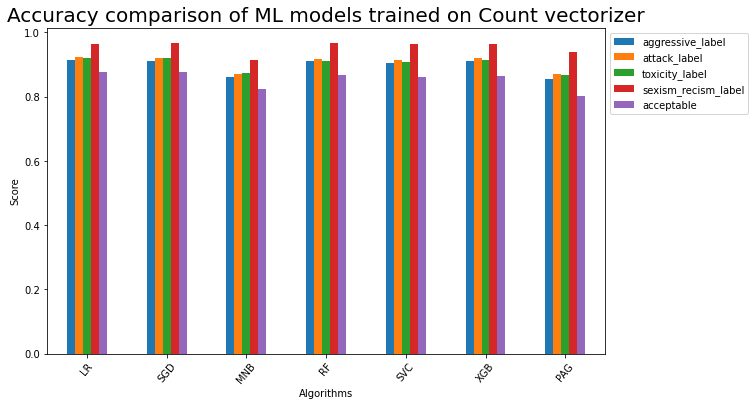

In [24]:
#plot comaparison 
acc_df.plot(x="models", y=["aggressive_label", "attack_label", "toxicity_label", "sexism_recism_label", "acceptable"], kind="bar",figsize=(10, 6))
plt.title("Accuracy comparison of ML models trained on Count vectorizer",fontsize=20)
plt.xlabel('Algorithms',fontsize=10)
plt.ylabel('Score',fontsize=10)
plt.xticks(rotation = 50)
plt.legend(loc = 2, bbox_to_anchor = (1,1),prop={'size': 10})
plt.show()

In [25]:
recall_df = pd.DataFrame(recall_data, index=['LR', 'SGD', 'MNB', 'RF', 'SVC', 'XGB', 'PAG'])
recall_df['models'] = recall_df.index
recall_df

,aggressive_label,attack_label,toxicity_label,sexism_recism_label,acceptable,models
LR,0.76790,0.77543,0.78735,0.74323,0.78691,LR
SGD,0.75212,0.76460,0.77914,0.74806,0.77859,SGD
MNB,0.81434,0.81986,0.81966,0.82524,0.80882,MNB
RF,0.74422,0.74881,0.75563,0.73330,0.76054,RF
SVC,0.70247,0.70924,0.71959,0.70403,0.72665,SVC
XGB,0.73128,0.74034,0.73859,0.72425,0.73149,XGB
PAG,0.74594,0.75436,0.75986,0.74775,0.73219,PAG


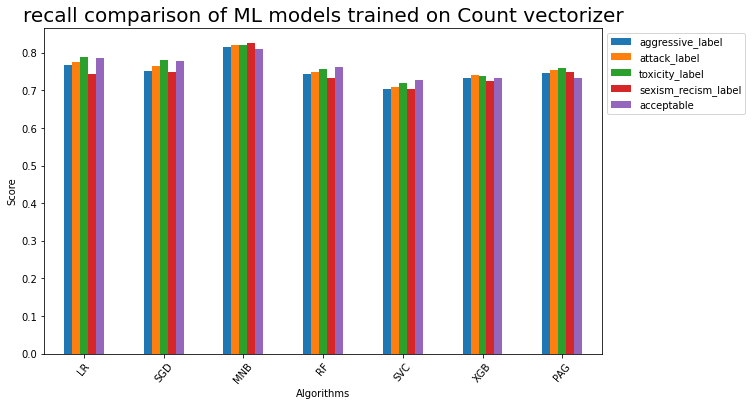

In [26]:
#plot comaparison 
recall_df.plot(x="models", y=["aggressive_label", "attack_label", "toxicity_label", "sexism_recism_label", "acceptable"], kind="bar",figsize=(10, 6))
plt.title("recall comparison of ML models trained on Count vectorizer",fontsize=20)
plt.xlabel('Algorithms',fontsize=10)
plt.ylabel('Score',fontsize=10)
plt.xticks(rotation = 50)
plt.legend(loc = 2, bbox_to_anchor = (1,1),prop={'size': 10})
plt.show()

In [27]:
precision_df = pd.DataFrame(precision_data, index=['LR', 'SGD', 'MNB', 'RF', 'SVC', 'XGB', 'PAG'])
precision_df['models'] = precision_df.index
precision_df

,aggressive_label,attack_label,toxicity_label,sexism_recism_label,acceptable,models
LR,0.85823,0.86483,0.87364,0.88876,0.84780,LR
SGD,0.86251,0.86836,0.87757,0.90426,0.85390,SGD
MNB,0.73671,0.73776,0.75246,0.67361,0.76092,MNB
RF,0.86251,0.86806,0.86645,0.91755,0.84958,RF
SVC,0.87910,0.88311,0.88222,0.90222,0.86543,SVC
XGB,0.87548,0.88235,0.88917,0.91097,0.86668,XGB
PAG,0.71484,0.72440,0.74091,0.71188,0.72473,PAG


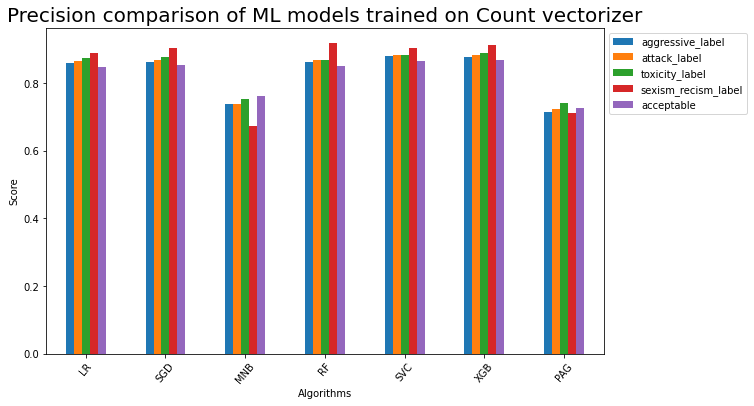

In [28]:
#plot comaparison 
precision_df.plot(x="models", y=["aggressive_label", "attack_label", "toxicity_label", "sexism_recism_label", "acceptable"], kind="bar",figsize=(10, 6))
plt.title("Precision comparison of ML models trained on Count vectorizer",fontsize=20)
plt.xlabel('Algorithms',fontsize=10)
plt.ylabel('Score',fontsize=10)
plt.xticks(rotation = 50)
plt.legend(loc = 2, bbox_to_anchor = (1,1),prop={'size': 10})
plt.show()

In [29]:
fscore_df = pd.DataFrame(fscore_data, index=['LR', 'SGD', 'MNB', 'RF', 'SVC', 'XGB', 'PAG'])
fscore_df['models'] = fscore_df.index
fscore_df

,aggressive_label,attack_label,toxicity_label,sexism_recism_label,acceptable,models
LR,0.81056,0.81770,0.82825,0.80950,0.81622,LR
SGD,0.80354,0.81318,0.82543,0.81878,0.81451,SGD
MNB,0.77358,0.77665,0.78462,0.74175,0.78414,MNB
RF,0.79901,0.80404,0.80726,0.81514,0.80260,RF
SVC,0.78092,0.78668,0.79265,0.79089,0.78999,SVC
XGB,0.79691,0.80513,0.80692,0.80695,0.79337,XGB
PAG,0.73006,0.73908,0.75026,0.72938,0.72844,PAG


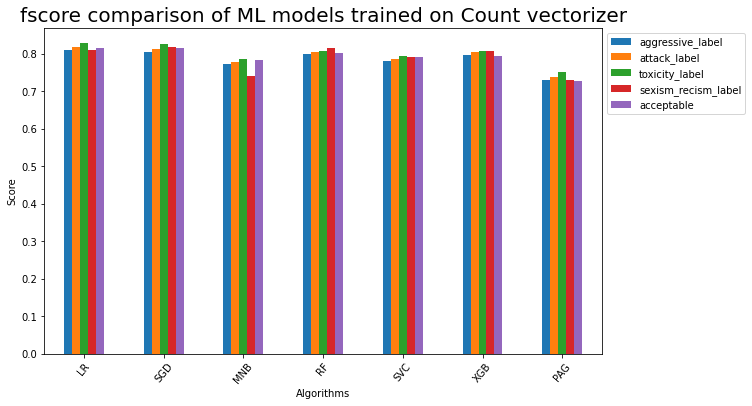

In [30]:
#plot comaparison 
fscore_df.plot(x="models", y=["aggressive_label", "attack_label", "toxicity_label", "sexism_recism_label", "acceptable"], kind="bar",figsize=(10, 6))
plt.title("fscore comparison of ML models trained on Count vectorizer",fontsize=20)
plt.xlabel('Algorithms',fontsize=10)
plt.ylabel('Score',fontsize=10)
plt.xticks(rotation = 50)
plt.legend(loc = 2, bbox_to_anchor = (1,1),prop={'size': 10})
plt.show()